<a href="https://colab.research.google.com/github/dandekarvaishali01/Data-Science-Project/blob/main/Dimensionality_reduction_USG_Manufacturing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Aug_10_Dimensionality reduction_Usg Manufacturing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
original_data=pd.read_csv("ultrasound_1.csv")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=original_data.copy()
df.shape

(1577, 577)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,NaN,NaN,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,NaN,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,NaN,NaN,NaN,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,0.0,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,NaN,NaN,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,NaN,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,149.6750,0.0405,0.0,1.4215,0.0009,0.0184,0.0200,0.01

In [ ]:
pd.set_option("display.max_columns",580)
pd.set_option("display.max_rows",100)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,NaN,NaN,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,NaN,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,NaN,NaN,NaN,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,0.0,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,NaN,NaN,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,NaN,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,149.6750,0.0405,0.0,1.4215,0.0009,0.0184,0.0200,0.01

In [ ]:
# for learning purpose we are using PCA here.. pl. note as per the problem statement PCA will not give us the solution.

In [ ]:
df["Pass/Fail"].value_counts()

-1    1472
 1     105
Name: Pass/Fail, dtype: int64

In [ ]:
df["Pass/Fail"]=df["Pass/Fail"].map({-1:0,1:1})

In [ ]:
df["Pass/Fail"].value_counts(normalize=True)

0    0.933418
1    0.066582
Name: Pass/Fail, dtype: float64

In [ ]:
#1-->quality pass
#0-->Fail

In [ ]:
df.isnull().sum().sum()

42093

In [ ]:
df=df.fillna(df.median())
df.isnull().sum().sum()

0

# PCA

In [ ]:
# lets check the accuracy keeping all the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
X=df.drop(["Pass/Fail"],axis=1)
Y=df["Pass/Fail"]

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [ ]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,-0.553063,-1.711134,-0.129183,-0.746137,-0.052495,0.0,0.123878,-0.036133,-0.116497,-0.280912,-0.048570,-0.725602,-0.523644,0.193955,-0.561267,0.338391,0.045645,-0.904960,-0.055858,-0.338649,-1.188207,1.191940,0.064350,0.621660,-1.183887,-0.203124,-1.118567,-1.063739,1.890356,1.169413,1.914934,0.060329,-0.218366,-0.238403,-0.132963,0.238395,-0.427585,0.171793,-0.404128,-2.232891,0.649115,0.0,0.554994,0.442276,-1.499339,-1.004428,0.834166,1.717734,-0.062334,0.935086,-0.895931,-0.949806,2.087259,0.605005,0.226306,1.765952,2.519743,0.335517,-0.094537,-0.543821,-0.493046,-1.477080,-0.994818,-0.449622,-0.050538,1.134143,0.228221,-1.022994,0.072911,-0.076390,-2.099545,-0.388502,0.013931,-0.403112,2.339987,1.904901,-1.188688,0.313888,-0.844755,1.732692,0.096543,0.357169,0.647000,0.449899,0.293085,-0.717335,-1.096672,0.548130,0.045650,-0.407198,2.292215,-0.195441,0.093517,-0.379639,0.067921,0.029181,-0.004880,1.229334,0.369294,-0.525927,-0.045274,-1.181682,-0.890754,0.06813,0.051215,-0.168596,-0.137841,0.137929,-0.073242,-0.180816,0.379609,-0.101804,-0.248679,0.452678,3.527418,-0.062821,-0.323925,0.191445,0.048947,-0.955835,0.039385,-0.163511,1.409632,0.992391,-0.603649,-0.587529,0.400620,1.247955,-0.941846,0.314989,-0.266190,0.548716,0.502980,0.237903,-0.050823,0.0,-0.584456,0.096027,-1.099945,0.618882,0.345281,0.108113,-0.235877,1.696757,-0.235093,-0.016261,0.041233,-0.772535,-0.049366,-0.281579,-0.084216,-0.014106,-0.743575,0.010055,-0.777689,-0.708543,-0.131044,-0.197224,-0.317424,0.273583,-1.005717,-1.436845,-1.215745,1.606201,0.204716,-0.439188,-1.236934,-0.439167,0.718744,-0.635390,-0.626984,0.0,0.0,-1.253777,-0.633188,-0.881704,-1.415155,-0.049726,-0.145281,0.0,-0.988593,-0.110931,-0.141280,0.019840,-0.334538,-0.508405,-0.462904,-0.461537,0.225932,0.185122,-0.340994,-

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=100,stratify=Y)

In [ ]:
#Lets check the performance with all columns
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
Y_pred=rf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9367088607594937

In [ ]:
# lets apply the PCA
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_scaled)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([5.47619431e-02, 3.67908024e-02, 2.82218597e-02, 2.55737668e-02,
       2.19366553e-02, 2.06178324e-02, 1.98226948e-02, 1.81043933e-02,
       1.66654380e-02, 1.60465321e-02, 1.47602898e-02, 1.33419303e-02,
       1.30917975e-02, 1.28967098e-02, 1.26620972e-02, 1.19900323e-02,
       1.14977172e-02, 1.13022167e-02, 1.10211838e-02, 1.05313350e-02,
       1.02022626e-02, 1.00221357e-02, 9.99030418e-03, 9.72173593e-03,
       9.48280146e-03, 9.32655112e-03, 9.26824367e-03, 8.93172316e-03,
       8.60495851e-03, 8.52139026e-03, 8.35379041e-03, 8.19948086e-03,
       8.17067679e-03, 7.95315500e-03, 7.73919126e-03, 7.71940630e-03,
       7.58841353e-03, 7.51576432e-03, 7.30508346e-03, 7.18199965e-03,
       7.10675367e-03, 6.92018407e-03, 6.85616391e-03, 6.75614835e-03,
       6.69584300e-03, 6.57528035e-03, 6.42002097e-03, 6.26282159e-03,
       6.23643422e-03, 6.09915459e-03, 6.07748494e-03, 5.97626508e-03,
       5.91289830e-03, 5.71300082e-03, 5.66363859e-03, 5.54403443e-03,
      

In [ ]:
len(pca.explained_variance_ratio_)

576

Text(0, 0.5, 'Explained variance ratio')

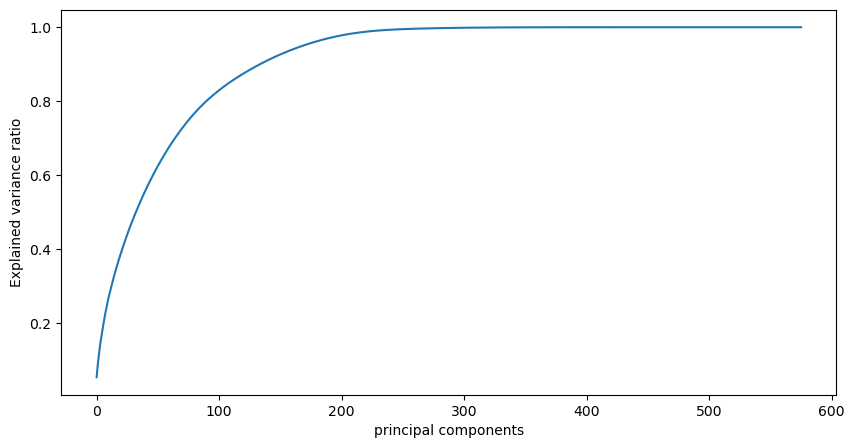

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("principal components")
plt.ylabel("Explained variance ratio")

In [ ]:
pca_200=PCA(n_components=200)
pca_applied=pca_200.fit_transform(X_scaled)

In [ ]:
pca_applied

array([[-1.52591572e+00,  3.69662164e+00,  2.28797250e+00, ...,
        -4.36389064e-01, -5.28606627e-02,  7.49416541e-01],
       [-6.24774512e-01,  1.68049894e+00,  2.35853440e+00, ...,
         6.94498862e-02,  5.35725739e-01,  6.30379409e-01],
       [-1.68558268e+00,  2.40846992e+00,  6.47352524e-01, ...,
        -5.36569573e-01, -2.01039997e-01,  2.33688020e-01],
       ...,
       [-2.34751653e-01,  2.85215296e+00,  6.87261906e-01, ...,
        -5.49564610e-03, -3.02334257e-02,  6.01676858e-01],
       [-1.22646797e+00,  2.74217402e+00,  1.87326931e+00, ...,
        -2.30764584e-01,  3.10816630e-01,  9.11925531e-01],
       [-2.25506213e+00,  2.34851204e+01, -4.72176147e+00, ...,
        -3.00094195e-01, -1.21906446e-01, -3.92467661e-01]])

In [ ]:
pca_applied_df=pd.DataFrame(data=pca_applied)

In [ ]:
pca_applied_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-1.525916,3.696622,2.287972,-4.642869,0.438883,-2.808041,-2.453813,3.862616,5.115352,-0.857740,0.911404,-1.358831,-1.522664,0.119806,-0.498830,-1.629418,-0.326568,-1.648500,-0.522443,0.021045,-1.729633,-1.113233,-4.034712,0.487505,-1.215376,-0.075097,-0.778219,0.169957,1.319836,-0.792995,-0.275340,1.440266,-0.460290,1.062973,2.810301,0.897494,0.475209,0.572468,-0.816188,-1.619944,1.083313,-0.457418,-1.096641,1.630976,-2.892719,0.339088,1.840451,1.520644,-1.560493,-2.269385,2.384570,-2.027022,-0.000713,0.764483,1.505872,0.808883,-1.028433,0.996103,-0.588369,0.112118,0.849651,-1.288926,-0.793069,-1.750929,0.047332,-1.165588,-0.864553,0.235929,0.405796,0.399731,-1.539953,-0.911013,-0.712268,0.367351,-0.212718,-0.127039,0.575585,-0.037319,-0.896640,1.175371,-0.749099,0.692395,-1.195788,1.106605,1.329014,0.226161,0.455735,0.538171,-1.125193,1.170681,-1.013766,1.443510,-0.261163,0.214571,-0.521000,0.378297,-0.117481,-0.600303,-0.681577,-1.751705,2.642002,-0.540081,-0.087402,0.669096,-2.627012,-0.501964,-1.081319,0.402549,-0.624700,0.480393,-0.771902,0.806882,-0.510496,0.413863,-0.172878,-1.035743,0.551955,-0.310123,-0.223234,-1.295443,1.406622,0.098075,-0.414196,-0.826685,0.148673,-0.037731,-0.321120,0.180016,-0.744802,0.274735,-1.476063,0.716169,-0.177977,-0.581427,0.263335,0.348159,-0.531345,0.057890,-0.666970,0.653002,-0.037988,-0.854808,0.761673,0.192315,0.052563,0.550055,0.482547,-1.246946,0.029952,-0.622959,-1.290404,-0.008013,-0.811199,-0.376620,0.725405,0.287370,-0.869987,-0.443879,1.177114,-0.209327,-0.333848,0.017746,0.988873,0.646270,0.452119,-1.369571,-0.282490,-0.191199,0.138421,-0.600498,-0.776278,-0.159159,0.177180,0.508932,-0.099115,0.636023,0.117301,0.655526,0.087977,0.362889,-0.492305,-0.001139,0.416770,-0.122180,-1.101410,0.303628,-0.043537,0.298565,-0.805534,0.347192,-0.413442,-0.077195,-0.832800,-0.976692,-0.694043,0.242917,-0.234423,-0.436389,-0.052861,0.749417
1,-0.624775,1.680499,2.358534,-2.343379,0.532350,0.398344,-3.119943,0.124351,3.087616,-1.562967,0.469928,-1.164326,-1.442365,-1.278586,-1.456964,4.144419,3.653099,-1.559139,-1.726160,0.124039,0.539275,0.102706,-0.970229,-3.604190,2.363010,-1.468356,-1.074066,-0.965292,1.611564,-1.835240,-0.324001,0.525003,0.259200,0.282642,-2.431658,0.104323,-0.491437,0.762512,1.230727,-1.262668,-0.337485,-0.838159,-3.116581,-0.327558,-0.954597,0.502846,1.594910,-0.333379,-2.249882,0.225474,-0.127341,-1.550012,0.558341,-1.858344,1.868484,-0.354675,0.405506,1.673579,3.287420,-0.174621,-1.343806,-1.558457,-1.781126,-1.797624,0.213359,-1.492799,-1.708001,1.433486,1.869909,1.957129,0.471182,-0.367059,-0.605932,2.169215,2.079320,-0.269023,-0.490498,-0.930825,-0.030238,-1.309966,1.368902,0.788407,-0.479104,-0.448746,-0.013070,-0.349494,0.137435,-0.234652,0.216040,-1.686580,-1.289375,-0.071795,0.235561,-0.664422,0.125580,-0.445151,-0.329708,0.360644,-1.712774,1.304384,1.350793,-0.313574,1.316945,0.542305,-0.905560,-0.439449,-0.132667,-0.356829,0.425946,-0.114649,-0.656443,-0.436215,0.874095,0.788090,0.736443,-0.102644,-0.218321,0.156299,-1.330071,-0.816655,-0.201771,0.012730,0.899057,0.288937,-0.208661,-0.753071,-0.007955,0.639634,0.345188,-0.889938,-0.706762,0.370199,-0.589289,-0.351415,-0.335717,-0.349470,0.641560,0.066556,-0.374896,0.626274,0.442537,-0.025392,0.823826,-0.204954,0.258776,-0.08468

In [ ]:
X_train_pca,X_test_pca,Y_train_pca,Y_test_pca=train_test_split(pca_applied_df,Y,test_size=0.2,random_state=100,stratify=Y)

In [ ]:
rf.fit(X_train_pca,Y_train_pca)

RandomForestClassifier()

In [ ]:
Y_pred_pca=rf.predict(X_test_pca)

In [ ]:
accuracy_score(Y_test_pca,Y_pred_pca)

0.9367088607594937

In [ ]:
# for this problem statement PCA is not the suitable candidate ..just for learning purpose

In [ ]:
# dimensionality reduction

In [ ]:
df1=original_data.copy()

In [ ]:
(df1.isnull().sum()/len(df1))*100

0            0.317058
1            0.443881
2            0.887762
3            0.887762
4            0.887762
               ...   
586          0.000000
587          0.000000
588          0.000000
589          0.000000
Pass/Fail    0.000000
Length: 577, dtype: float64

In [ ]:
high_null=df1.isnull().sum()/len(df1)
high_missing=high_null[high_null>=0.40].index

In [ ]:
high_missing.shape

(32,)

In [ ]:
df2=df1.drop(high_missing,axis=1)

In [ ]:
df2.isnull().sum().sum()

8769

In [ ]:
df2.fillna(df2.median(),inplace=True)
df2.isnull().sum().sum()

0

In [ ]:
df1.shape

(1577, 577)

In [ ]:
df2.shape

(1577, 545)

In [ ]:
df2["Pass/Fail"]=df2["Pass/Fail"].map({-1:0,1:1})

In [ ]:
df2["Pass/Fail"].value_counts(normalize=True)

0    0.933418
1    0.066582
Name: Pass/Fail, dtype: float64

In [ ]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,0.0,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,149.6750,0.0405,0.0,1.4215,0.0009,0.0184,0.0200,0.0185,0.0068,1.4851,0.0,3.6773,2.2494,0.2329,0.0040,1.3352,0.1432,0.0121,79.3662,247.4448,361.1809,68.4513,0.0510,0.0339,0.0555,0.8846,0.1878,0.0196,0.0639,0.3615,0.0519,0.1137,0.1623,0.1137

In [ ]:
# finding the zero variance column

In [ ]:
one_unique=df2.apply(pd.Series.nunique)
const_cols=one_unique[one_unique==1].index
const_cols

Index(['5', '42', '141', '178', '179', '186', '226', '229', '230', '231',
       ...
       '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'],
      dtype='object', length=104)

In [ ]:
df3=df2.drop(const_cols,axis=1)

In [ ]:
df3.shape

(1577, 441)

In [ ]:
# splitting -- dependent and independent variable

In [ ]:
X=df3.drop(["Pass/Fail"],axis=1)
Y=df3["Pass/Fail"]

In [ ]:
# Multi-collinearity

In [ ]:
corr_matrix=X.corr(method="spearman")

In [ ]:
corr_matrix

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,365,366,367,368,376,377,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,499,500,510,511,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589
0,1.000000,-0.174254,-0.004933,0.000871,-0.003782,-0.015269,0.002752,-0.066828,0.024701,-0.008397,0.065179,-0.000054,0.006828,-0.007177,-0.034343,0.043736,0.008633,-0.027135,0.024516,0.010032,0.001900,-0.047904,-0.022133,0.070766,0.055095,0.091101,0.040223,-0.040198,-0.042307,-0.027299,0.056066,-0.018182,0.039357,-0.037643,-0.039353,-0.038540,-0.031190,-0.056404,0.039747,-0.011484,-0.038381,0.056423,-0.015804,-0.028857,-0.027795,0.014282,-0.036898,-0.068498,-0.023963,0.011434,-0.027557,-0.003773,-0.030167,-0.013211,-0.074513,-0.027073,0.023119,-0.001130,-0.044893,-0.019305,-0.023269,-0.009466,-0.000528,0.040881,-0.011222,-0.024027,0.061513,0.021058,0.003397,0.055788,-0.100766,-0.016721,0.036341,0.039646,-0.010677,0.043705,-0.023369,0.014540,-0.034366,0.048896,-0.003109,0.019739,-0.006845,-0.010303,0.014877,-0.049546,-0.002423,-0.021163,-0.025367,0.059747,-0.022333,-0.054965,-0.078972,0.023286,0.004550,0.008228,-0.018723,-0.032654,-0.002403,0.024376,0.001793,0.043743,0.008008,-0.036906,-0.042784,0.017883,0.000703,0.016662,-0.008373,-0.017618,0.059767,-0.018446,0.007839,-0.023243,-0.064164,0.017075,-0.005099,0.027480,-0.003866,0.012588,-0.026684,0.166904,0.160508,-0.025013,0.005922,-0.034396,-0.014471,-0.021846,0.011390,-0.013585,-0.018779,-0.074336,-0.024916,0.010536,-0.019936,-0.023562,-0.049745,-0.024052,-0.060054,0.015988,0.023327,0.020086,-0.007982,0.071525,0.015302,0.023588,0.009754,0.007251,0.045459,0.023791,0.050874,-0.014185,0.007999,0.011777,0.036001,0.011786,0.016102,-0.009920,0.001579,0.001511,0.013255,-0.000152,-0.017746,0.013718,0.011766,0.002082,-0.052489,0.020065,-0.012295,-0.014828,-0.037142,-0.014970,-0.012831,-0.003858,-0.023380,-0.004540,-0.017405,-0.024501,0.008713,-0.029653,-0.034583,-0.006425,-0.059784,-0.044332,-0.057815,0.008381,-0.009390,0.052310,-0.030191,-0.005336,-0.056148,0.015802,-0.013286,-0.016532,-0.009165,-0.014327,-0.038339,-0.024637,-0.028979,-0.000869,0.007819,0.024322,0.008066,-0.046765,-0.003566,-0.008881,0.010153,-0.068380,0.073893,-0.011021,0.030055,-0.024980,0.171107,0.147988,-0.010692,0.011004,-0.036307,-0.011101,-0.024328,0.015307,-0.008095,-0.017618,-0.073954,-0.016307,0.005380,-0.021305,-0.026004,-0.051387,-0.016957,-0.063954,0.028046,0.024647,0.011238,-0.006625,0.071010,0.016241,0.020704,0.010402,-0.008093,0.041933,0.018110,0.056064,0.001314,0.014153,

<Axes: >

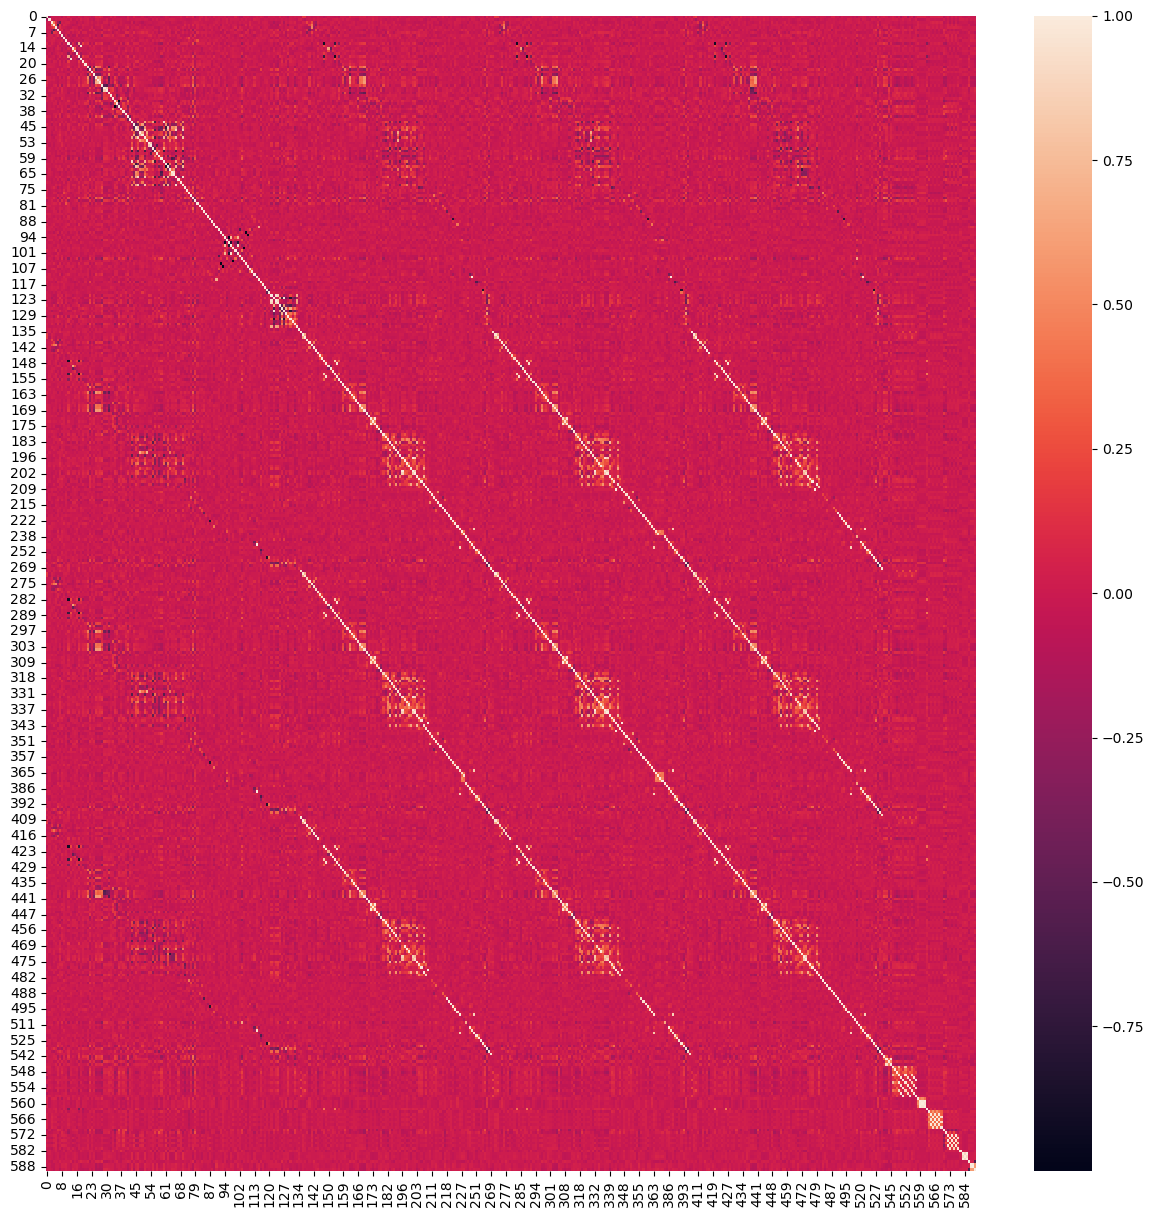

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix)

In [ ]:
# create the upper matrix only --- because the upper and lower matrix (triangles are mirror )

In [ ]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

In [ ]:
upper

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,365,366,367,368,376,377,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,499,500,510,511,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589
0,NaN,-0.174254,-0.004933,0.000871,-0.003782,-0.015269,0.002752,-0.066828,0.024701,-0.008397,0.065179,-0.000054,0.006828,-0.007177,-0.034343,0.043736,0.008633,-0.027135,0.024516,0.010032,0.001900,-0.047904,-0.022133,0.070766,0.055095,0.091101,0.040223,-0.040198,-0.042307,-0.027299,0.056066,-0.018182,0.039357,-0.037643,-0.039353,-0.038540,-0.031190,-0.056404,0.039747,-0.011484,-0.038381,0.056423,-0.015804,-0.028857,-0.027795,0.014282,-0.036898,-0.068498,-0.023963,0.011434,-0.027557,-0.003773,-0.030167,-0.013211,-0.074513,-0.027073,0.023119,-0.001130,-0.044893,-0.019305,-0.023269,-0.009466,-0.000528,0.040881,-0.011222,-0.024027,0.061513,0.021058,0.003397,0.055788,-0.100766,-0.016721,0.036341,0.039646,-0.010677,0.043705,-0.023369,0.014540,-0.034366,0.048896,-0.003109,0.019739,-0.006845,-0.010303,0.014877,-0.049546,-0.002423,-0.021163,-0.025367,0.059747,-0.022333,-0.054965,-0.078972,0.023286,0.004550,0.008228,-0.018723,-0.032654,-0.002403,0.024376,0.001793,0.043743,0.008008,-0.036906,-0.042784,0.017883,0.000703,0.016662,-0.008373,-0.017618,0.059767,-0.018446,0.007839,-0.023243,-0.064164,0.017075,-0.005099,0.027480,-0.003866,0.012588,-0.026684,0.166904,0.160508,-0.025013,0.005922,-0.034396,-0.014471,-0.021846,0.011390,-0.013585,-0.018779,-0.074336,-0.024916,0.010536,-0.019936,-0.023562,-0.049745,-0.024052,-0.060054,0.015988,0.023327,0.020086,-0.007982,0.071525,0.015302,0.023588,0.009754,0.007251,0.045459,0.023791,0.050874,-0.014185,0.007999,0.011777,0.036001,0.011786,0.016102,-0.009920,0.001579,0.001511,0.013255,-0.000152,-0.017746,0.013718,0.011766,0.002082,-0.052489,0.020065,-0.012295,-0.014828,-0.037142,-0.014970,-0.012831,-0.003858,-0.023380,-0.004540,-0.017405,-0.024501,0.008713,-0.029653,-0.034583,-0.006425,-0.059784,-0.044332,-0.057815,0.008381,-0.009390,0.052310,-0.030191,-0.005336,-0.056148,0.015802,-0.013286,-0.016532,-0.009165,-0.014327,-0.038339,-0.024637,-0.028979,-0.000869,0.007819,0.024322,0.008066,-0.046765,-0.003566,-0.008881,0.010153,-0.068380,0.073893,-0.011021,0.030055,-0.024980,0.171107,0.147988,-0.010692,0.011004,-0.036307,-0.011101,-0.024328,0.015307,-0.008095,-0.017618,-0.073954,-0.016307,0.005380,-0.021305,-0.026004,-0.051387,-0.016957,-0.063954,0.028046,0.024647,0.011238,-0.006625,0.071010,0.016241,0.020704,0.010402,-0.008093,0.041933,0.018110,0.056064,0.001314,0.014153,0.011

<Axes: >

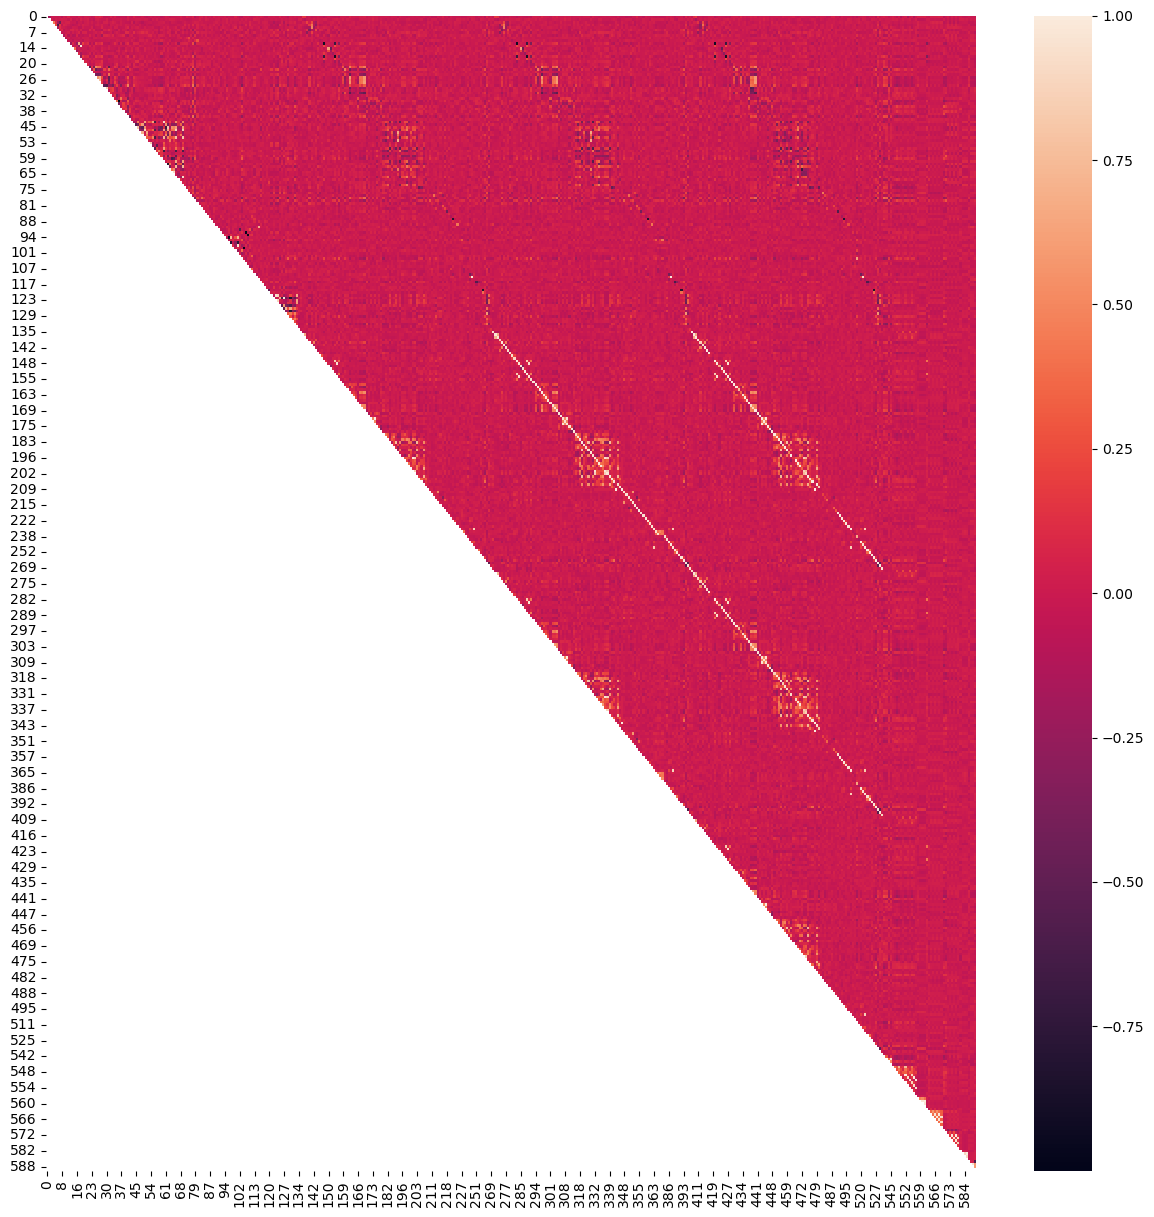

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(upper)

In [ ]:
# finding the  high +ve & high -ve correlation .. assume our bench mark is +/-0.7

In [ ]:
neg_corr=[column for column in upper.columns if any(upper[column]<=-0.7)]
pos_corr=[column for column in upper.columns if any(upper[column]>=0.7)]

In [ ]:
print("high negative corr \n ", neg_corr)
print("high positive corr \n ", pos_corr)

high negative corr 
  ['36', '60', '62', '96', '98', '101', '104', '105', '106', '130', '147', '153', '222', '254', '282', '288', '360', '392', '420', '426', '472', '494', '526']
high positive corr 
  ['18', '27', '30', '46', '50', '54', '60', '62', '65', '66', '70', '98', '101', '115', '123', '124', '127', '128', '153', '154', '174', '187', '201', '202', '203', '249', '250', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '316', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '337', '338', '339', '340', '341', '342', '343', '344', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '359', '360', '361', '362', '363', '365', '366', '376', '377', '386', '387', '388', '389', '390', '391', '392', '393', '405'

In [ ]:
total_corr=neg_corr+pos_corr
len(total_corr)

234

In [ ]:
X1=X.drop(total_corr,axis=1)

In [ ]:
X1.shape

(1577, 219)

In [ ]:
X1.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,19,20,21,22,23,24,25,26,28,29,31,32,33,34,35,37,38,39,40,41,43,44,45,47,48,51,53,55,56,57,58,59,61,63,64,67,68,71,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,99,100,102,103,107,108,113,114,116,117,118,119,120,121,122,125,126,129,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,148,150,151,152,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,185,188,195,196,197,198,199,200,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,223,224,225,227,228,238,239,248,251,252,253,255,267,268,269,336,367,368,418,419,423,433,460,468,482,483,484,485,486,487,488,489,499,500,510,511,542,543,544,546,547,548,550,551,558,559,562,563,564,565,570,571,572,573,582,583,586,587,589
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,65.8000,3.1444,4.7036,85.4579,8.6667,50.2987,64.2122,66.0973,86.9255,117.9550,14.55,4.866,358.9764,10.1073,124.9991,1.3362,147.7673,214.7661,4.544,2910.0,0.9330,0.9502,4.7451,26.7745,10.3983,10.5591,13.2255,1.0994,152.2500,72.1031,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0223,0.0000,0.0010,-0.0060,-0.1042,-0.0873,0.9471,0.0,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,0.9176,2.761,0.6623,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,4.58,0.0043,0.0525,0.0800,0.0626,4.0267,12.328,6.774,0.8158,0.45,0.0359,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.8603,0.1965,0.219,14.82,0.404,7.08,16.977,0.1392,6.32,40.839,0.231,9.01,16.55,0.284,3.88,13.62,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,0.0353,63.5398,0.0670,1460.8999,0.0308,0.0193,0.0041,0.0042,0.0203,0.0012,2.9093,0.0273,0.3552,0.0699,8.140,2.3331,6.4306,0.0036,0.0072,0.0000,0.0000,129.4674,10.4649,19.0156,33.6514,230.2835,194.4346,0.0000,292.4117,183.7686,125.7636,128.3202,559.7668,0.0000,0.0000,68.7631,0.000,0.1096,0.0078,0.0026,0.6110,401.080,80.404,21.84,1.53,1.0068,0.3311,265.296,0.6275,5.22,0.0543,535.0655,2.2935,8.10,0.1188,0.5025,0.0128,0.0199,0.0117,58.5665
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,103.5633,0.1216,1.4891,-0.0007,-0.0088,0.9600,202.7228,2.4472,412.4277,10.7668,0.9740,12.5098,1.3811,-6290.25,3032.75,-3972.00,1497.50,0.9865,1.8942,70.2444,2.6333,4.6613,84.8180,8.6309,50.2512,64.2144,65.9697,86.7969,117.4996,78.31,2.408,360.5227,9.7645,148.9018,1.0834,134.4973,210.7175,4.589,2880.0,0.9341,0.9449,4.7581,-3.2509,9.9095,11.1138,23.2509,1.2059,147.0755,69.7495,-0.0299,-0.0192,0.0096,-0.0322,0.0025,0.0320,-0.0335,0.0292,7.2000,0.1380,2.4262,0.9873,1861.4446,0.2013,9150.2299,-0.0464,-0.0004,0.0016,0.0000,0.0002,0.0837,0.0000,0.0078,-0.0043,-0.0819,-0.1621,0.9447,0.0,0.9907,58.9346,0.5910,0.9700,6.2083,15.79,3.742,1.0210,2.745,0.0946,0.9961,2.3505,1010.4211,37.9038,98.0,74.3,84.8,65.0000,313.9860,0.1351,5.96,0.0052,0.2425,0.0529,0.0488,8.3051,2.492,12.072,0.8296,0.41,0.0394,198.0,705.0,1326.0,51.0,0.092,0.054,0.033,2.6,1.0,0.091,0.129,0.9737,0.1305,0.3313,0.5099,0.8317,0.2906,0.372,14.61,0.247,7.28,25.141,0.0865,6.10,56.751,0.243,3.72,18.56,0.738,4.30,16.08,0.7346,10.79,22.91,93.124,0.0,0.1068,0.0349,0.0320,0.0857,0.0741,0.0845,0.0839,0.0646,5.8604,0.0024,0.0438,121.8027,0.0534,1499.0000,0.0238,0.0222,0.0061,0.0036,0.0194,0.0007,2.9933,0.0362,0.2213,0.0836,8.980,1.9870,8.8469,0.0039,0.0047,0.0000,556.1254,101.8314,3.4057,26.9323,114.4298,356.8922,182.2454,335.0785,266.1491,0.0000,264.0625,250.6348,221.4857,0.0000,0.0000,142.6901,320.000,0.1096,0.0078,0.0026,0.7262,406.948,73.544,17.61,0.83,1.0052,0.5784,261.956,0.7711,9.90,0.0918,531.0300,2.2599,9.08,0.2787,0.5003,0.0150,0.0228,0.0299,131.2543
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,104.1478,

In [ ]:
# VIF  variance inflation factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif10=pd.DataFrame()
vif10["Variables"]=X1.columns

In [ ]:
vif10["VIF_value"]=[variance_inflation_factor(X1.values,i)for i in range(X1.shape[1])]
vif10

,Variables,VIF_value
0,0,2173.176269
1,1,1202.248923
2,2,9028.430092
3,3,32.652472
4,4,28265.553624
...,...,...
214,582,28359.142051
215,583,3.050342
216,586,7.897884
217,587,8.210590


In [ ]:
high_vif=vif10[vif10["VIF_value"]>10]
high_vif.shape

(144, 2)

In [ ]:
# additing a constant is needed

In [ ]:
import statsmodels.api as sm
X2=sm.add_constant(X1)

In [ ]:
X2.head()

,const,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,19,20,21,22,23,24,25,26,28,29,31,32,33,34,35,37,38,39,40,41,43,44,45,47,48,51,53,55,56,57,58,59,61,63,64,67,68,71,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,99,100,102,103,107,108,113,114,116,117,118,119,120,121,122,125,126,129,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,148,150,151,152,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,185,188,195,196,197,198,199,200,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,223,224,225,227,228,238,239,248,251,252,253,255,267,268,269,336,367,368,418,419,423,433,460,468,482,483,484,485,486,487,488,489,499,500,510,511,542,543,544,546,547,548,550,551,558,559,562,563,564,565,570,571,572,573,582,583,586,587,589
0,1.0,2973.86,2359.01,2196.6555,1066.1908,1.2188,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,65.8000,3.1444,4.7036,85.4579,8.6667,50.2987,64.2122,66.0973,86.9255,117.9550,14.55,4.866,358.9764,10.1073,124.9991,1.3362,147.7673,214.7661,4.544,2910.0,0.9330,0.9502,4.7451,26.7745,10.3983,10.5591,13.2255,1.0994,152.2500,72.1031,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0223,0.0000,0.0010,-0.0060,-0.1042,-0.0873,0.9471,0.0,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,0.9176,2.761,0.6623,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,4.58,0.0043,0.0525,0.0800,0.0626,4.0267,12.328,6.774,0.8158,0.45,0.0359,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.8603,0.1965,0.219,14.82,0.404,7.08,16.977,0.1392,6.32,40.839,0.231,9.01,16.55,0.284,3.88,13.62,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,0.0353,63.5398,0.0670,1460.8999,0.0308,0.0193,0.0041,0.0042,0.0203,0.0012,2.9093,0.0273,0.3552,0.0699,8.140,2.3331,6.4306,0.0036,0.0072,0.0000,0.0000,129.4674,10.4649,19.0156,33.6514,230.2835,194.4346,0.0000,292.4117,183.7686,125.7636,128.3202,559.7668,0.0000,0.0000,68.7631,0.000,0.1096,0.0078,0.0026,0.6110,401.080,80.404,21.84,1.53,1.0068,0.3311,265.296,0.6275,5.22,0.0543,535.0655,2.2935,8.10,0.1188,0.5025,0.0128,0.0199,0.0117,58.5665
1,1.0,3052.82,2525.33,2186.2667,1088.7359,1.2723,103.5633,0.1216,1.4891,-0.0007,-0.0088,0.9600,202.7228,2.4472,412.4277,10.7668,0.9740,12.5098,1.3811,-6290.25,3032.75,-3972.00,1497.50,0.9865,1.8942,70.2444,2.6333,4.6613,84.8180,8.6309,50.2512,64.2144,65.9697,86.7969,117.4996,78.31,2.408,360.5227,9.7645,148.9018,1.0834,134.4973,210.7175,4.589,2880.0,0.9341,0.9449,4.7581,-3.2509,9.9095,11.1138,23.2509,1.2059,147.0755,69.7495,-0.0299,-0.0192,0.0096,-0.0322,0.0025,0.0320,-0.0335,0.0292,7.2000,0.1380,2.4262,0.9873,1861.4446,0.2013,9150.2299,-0.0464,-0.0004,0.0016,0.0000,0.0002,0.0837,0.0000,0.0078,-0.0043,-0.0819,-0.1621,0.9447,0.0,0.9907,58.9346,0.5910,0.9700,6.2083,15.79,3.742,1.0210,2.745,0.0946,0.9961,2.3505,1010.4211,37.9038,98.0,74.3,84.8,65.0000,313.9860,0.1351,5.96,0.0052,0.2425,0.0529,0.0488,8.3051,2.492,12.072,0.8296,0.41,0.0394,198.0,705.0,1326.0,51.0,0.092,0.054,0.033,2.6,1.0,0.091,0.129,0.9737,0.1305,0.3313,0.5099,0.8317,0.2906,0.372,14.61,0.247,7.28,25.141,0.0865,6.10,56.751,0.243,3.72,18.56,0.738,4.30,16.08,0.7346,10.79,22.91,93.124,0.0,0.1068,0.0349,0.0320,0.0857,0.0741,0.0845,0.0839,0.0646,5.8604,0.0024,0.0438,121.8027,0.0534,1499.0000,0.0238,0.0222,0.0061,0.0036,0.0194,0.0007,2.9933,0.0362,0.2213,0.0836,8.980,1.9870,8.8469,0.0039,0.0047,0.0000,556.1254,101.8314,3.4057,26.9323,114.4298,356.8922,182.2454,335.0785,266.1491,0.0000,264.0625,250.6348,221.4857,0.0000,0.0000,142.6901,320.000,0.1096,0.0078,0.0026,0.7262,406.948,73.544,17.61,0.83,1.0052,0.5784,261.956,0.7711,9.90,0.0918,531.0300,2.2599,9.08,0.2787,0.5003,0.0150,0.0228,0.0299,131.2543
2,1.0,2914.47,2492.14,2181.6111,1083.393

In [ ]:
vif10=pd.DataFrame()
vif10["Variables"]=X2.columns

In [ ]:
vif10["VIF_value"]=[variance_inflation_factor(X2.values,i)for i in range(X2.shape[1])]
vif10

,Variables,VIF_value
0,const,967269.601575
1,0,1.299352
2,1,1.231460
3,2,1.630968
4,3,2.953120
...,...,...
215,582,1.315094
216,583,1.257993
217,586,1.966605
218,587,1.833526


In [ ]:
high_vif=vif10[vif10["VIF_value"]>10]
high_vif.shape

(34, 2)

In [ ]:
X3=X2.drop(high_vif["Variables"],axis=1)
X3.shape

(1577, 186)

In [ ]:
# Feature selection methods

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif,mutual_info_classif

In [ ]:
beastfeatures=SelectKBest(score_func=mutual_info_classif,k=50)
bestfeatures=beastfeatures.fit(X3,Y)

In [ ]:
bestfeatures

SelectKBest(k=50,
            score_func=<function mutual_info_classif at 0x00000232619C6160>)

In [ ]:
bestfeatures.scores_

array([6.25166643e-03, 0.00000000e+00, 1.89958831e-02, 7.88624748e-03,
       1.76466508e-02, 3.33560810e-03, 0.00000000e+00, 7.00903435e-03,
       0.00000000e+00, 6.20576365e-03, 2.12201038e-03, 1.13573254e-02,
       1.93196335e-02, 2.55331145e-02, 4.58290966e-03, 5.47818096e-03,
       2.61796395e-03, 0.00000000e+00, 4.37714261e-03, 1.61895110e-02,
       5.03493835e-03, 1.47326892e-02, 2.26968777e-02, 1.42447079e-02,
       1.74263905e-02, 1.00589718e-02, 8.99862720e-03, 1.59722865e-02,
       2.26496281e-02, 0.00000000e+00, 4.34534507e-03, 5.33400948e-03,
       6.66990744e-03, 2.12078952e-02, 1.44162619e-02, 1.45311474e-02,
       1.24857901e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.00245743e-03, 0.00000000e+00, 1.52970300e-02, 9.50970434e-03,
       6.27505406e-03, 1.98591238e-03, 6.49387323e-03, 4.82965334e-03,
       1.94362006e-02, 5.19452959e-03, 0.00000000e+00, 2.11320847e-02,
       1.51058847e-02, 0.00000000e+00, 1.60581496e-02, 9.18905163e-03,
      

In [ ]:
dfscores=pd.DataFrame(bestfeatures.scores_)

In [ ]:
dfscores

,0
0,0.006252
1,0.000000
2,0.018996
3,0.007886
4,0.017647
...,...
181,0.006790
182,0.018872
183,0.013779
184,0.004398


In [ ]:
dfcolumns=pd.DataFrame(X3.columns)

In [ ]:
featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores

,0,0
0,0,0.006252
1,1,0.000000
2,2,0.018996
3,3,0.007886
4,6,0.017647
...,...,...
181,582,0.006790
182,583,0.018872
183,586,0.013779
184,587,0.004398


In [ ]:
featurescores.columns=["feature","score"]
featurescores

,feature,score
0,0,0.006252
1,1,0.000000
2,2,0.018996
3,3,0.007886
4,6,0.017647
...,...,...
181,582,0.006790
182,583,0.018872
183,586,0.013779
184,587,0.004398


In [ ]:
featurescores.nlargest(50,"score")

,feature,score
178,571,0.031147
185,589,0.027430
180,573,0.026436
78,133,0.025771
13,19,0.025533
177,570,0.023555
161,510,0.023439
72,122,0.023096
22,33,0.022697
28,41,0.022650


# Recursive feature elimination cv

In [ ]:
from sklearn.feature_selection import RFECV,SelectFromModel

In [ ]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rfecv=RFECV(rf)
rfecv.fit(X3,Y)

KeyboardInterrupt: 

In [ ]:
rf.